#Cosine Sign Correlation
##Table of Contents:


1. Area of Inquiry
2. Transitioning to three dimensions



In [2]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sympy.solvers import solve
from sympy import Symbol
import pandas as pd
import matplotlib.patches as mpatches

## Area of Inquiry

We are exploring the phenomenon known as the coupling/decoupling of cosine functions. Consider two cosine functions:

$$f(x) = \cos (ax)$$
$$g(x) = \cos (bx)$$

Where $a,b$ are arbitrary integers. If we plot these two functions, we can see their coupling, or in this case how much and how long they are both positive/negative. That is our primary concern, for which values of $a$ and $b$ can we minimize the amount of time that these two functions share the same sign.

Note that sinusoidal functions are infinite, and we expect two infinite functions to share the same sign about 50% of the time. Would you be surprised if I told you that this is not always the case?

For example, let $a=1$ and $b=3$:

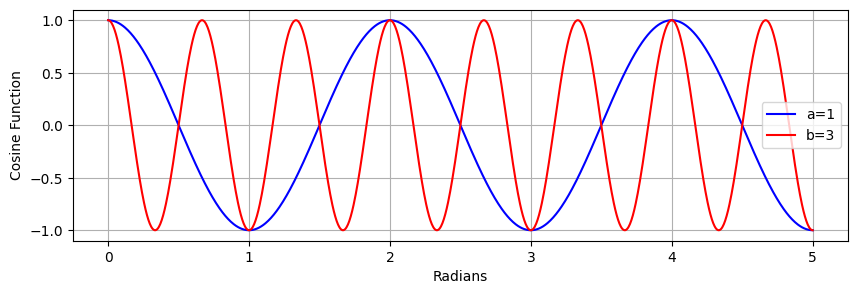

In [3]:
fig = plt.figure(figsize=(10,3))
plt.plot(np.linspace(0,5,1000),np.cos(1*np.linspace(0,5,1000)*np.pi), color='blue', label='a=1')
plt.plot(np.linspace(0,5,1000),np.cos(3*np.linspace(0,5,1000)*np.pi), color='red', label='b=3')
plt.xlabel('Radians')
plt.ylabel('Cosine Function')
plt.legend()
plt.grid()
plt.show()

We can see when the functions share the same sign in particular increments unique to the constants $a$ and $b$ that define them. In the example above, $f$ and $g$ share the same sign from 0 to $\frac{\pi}{3}$, $\frac{2\pi}{3}$ to $\frac{4\pi}{3}$, and so on.

In fact, a better way to model this is on a torus. As sinsusoidal functions are periodic, the times where two cosine functions share the same sign are also periodic. Hence, on a torus, we can express infinite functions in a finite manner:

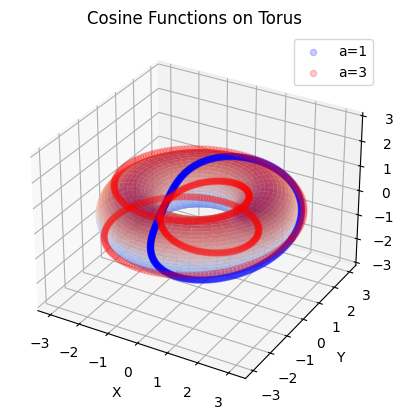

In [4]:
def torus_cosine_plot(r, R, cosine_arr, color_arr):

  # Configure torus to r, R values
  n = 500
  theta = np.linspace(0, 2.*np.pi, n)
  phi = np.linspace(0, 2.*np.pi, n)
  theta_grid, phi_grid = np.meshgrid(theta, phi)
  x = (R + r*np.cos(theta_grid)) * np.cos(phi_grid)
  y = (R + r*np.cos(theta_grid)) * np.sin(phi_grid)
  z = r*np.sin(theta_grid)

  # Plot the cosine functions now
  fig = plt.figure()
  ax1 = fig.add_subplot(111, projection='3d', computed_zorder=False)
  ax1.set_zlim(-3,3)
  ax1.plot_surface(x, y, z, cmap = cm.coolwarm, alpha = 0.7, zorder=0.1)

  for i, a in enumerate(cosine_arr):
    cosine_x = (R + 0.1 + r*np.cos(theta)) * np.cos(a*phi)
    cosine_y = (R + 0.1 + r*np.cos(theta)) * np.sin(a*phi)
    cosine_z = r*np.sin(theta)
    ax1.scatter(cosine_x, cosine_y, cosine_z, color=color_arr[i], label='a='+str(a), alpha=0.2, zorder=0.4)

  ax1.legend()

  ax1.set_xlabel('X')
  ax1.set_ylabel('Y')
  ax1.set_zlabel('Z')
  ax1.set_title('Cosine Functions on Torus')

torus_cosine_plot(1, 2, [1, 3], ['blue', 'red'])

Now we've made these inifinite functions finite. But this is still complicated as we are dealing in 3 dimensions when placing cosine functions on a torus. We then simplify the situation even further by 'unwrapping' the torus. That is, we turn the torus into a 2 dimensional plane like so:

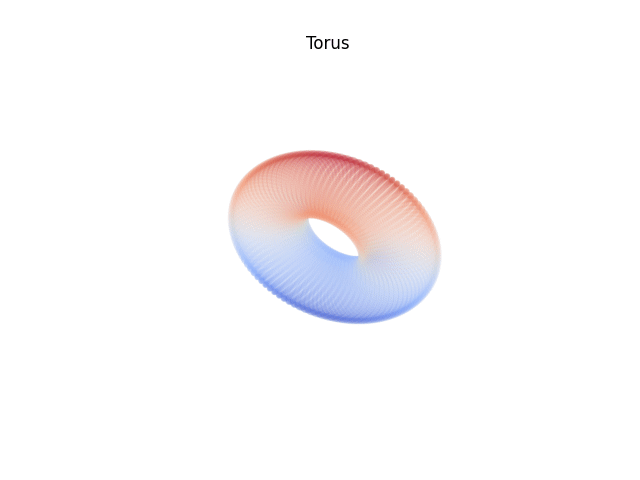

Click [here](https://https://github.com/mmlegate/Cosine-Sign-Correlation) for the code used to make that gif.



Thus the cosine functions on the plane of width and height $2\pi$ become:

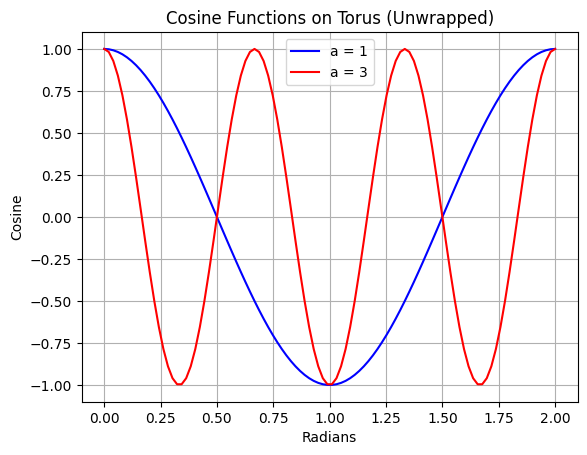

In [5]:
x = np.linspace(0, 2, 100)
coeffs = [1, 3]
color_arr = ['blue', 'red']

fig = plt.figure()

for i,a  in enumerate(coeffs):
    y = np.cos(a*np.pi*x)
    plt.plot(x, y, color=color_arr[i], label='a = {}'.format(a))

plt.xlabel('Radians')
plt.ylabel('Cosine')
plt.title('Cosine Functions on Torus (Unwrapped)')
plt.grid()
plt.legend()
plt.show()


Now, we are not very concerned with the shape of the cosine functions, only whether they are positive and negative. We find that this is viewable when we plot the ratio of coefficients for two cosine functions.

Consider $\cos(x)$ and $\cos(3x)$. The ratio of their coefficients is 3, and we can plot this ratio in the form of $y = 3x$. Note that we're on a torus still, so whenever the function reaches the top, it re-enters from the bottom:

In [7]:
def find_sign_change(coeff=1):
  """
  Finds the x-values corresponding to sign changes in a cosine function

  Parameters:
  coeff: Coefficient of cosine function

  Returns:
  important_x: Array of x-values corresponding to sign changes
  """
  unit = 1 / (2*coeff)
  important_x = [0]
  for i in range(0, 2*coeff):
    important_x.append(unit + 2*unit*i)
  important_x.append(2)
  return np.array(important_x)

def get_patches(coeffs):
  """
  Finds the coordinates and dimensions of regions where two cosine functions share the same sign

  Parameters:
  coeffs: Coefficients of two cosine functions

  Returns:
  patches: List of matplotlib patches
  """
  patches = []

  important_min_x = find_sign_change(min(coeffs))
  important_max_x = find_sign_change(max(coeffs))

  # Add patches where two cosine functions are both positive
  for i in range(0, len(important_min_x), 2):
    for j in range(0, len(important_max_x), 2):
      vert = [important_min_x[i], important_max_x[j]]
      width = important_min_x[i+1] - important_min_x[i]
      height = important_max_x[j+1] - important_max_x[j]
      rect = mpatches.Rectangle(vert, width, height, alpha=0.1, facecolor="blue")
      patches.append(rect)

  # Add patches where two cosine functions are both negative
  for i in range(1, len(important_min_x)-1, 2):
    for j in range(1, len(important_max_x)-1, 2):
      vert = [important_min_x[i], important_max_x[j]]
      width = important_min_x[i+1] - important_min_x[i]
      height = important_max_x[j+1] - important_max_x[j]
      rect = mpatches.Rectangle(vert, width, height, alpha=0.1, facecolor="blue")
      patches.append(rect)

  return patches

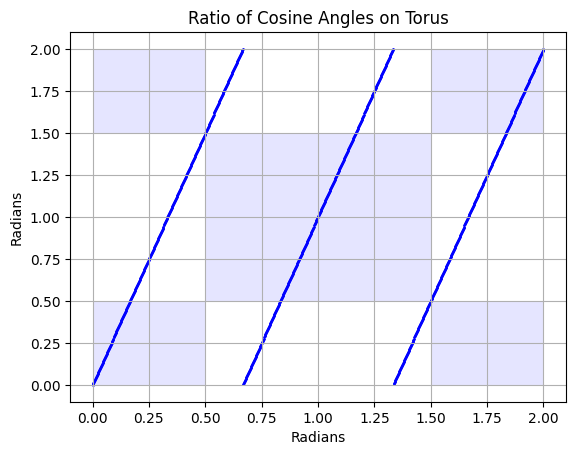

In [21]:
# Choose your two coefficients here!
coeffs = [1, 3]

# Calculate slope from coefficients
slope = max(coeffs)/min(coeffs)

# Define original set of linear lines
# Original set should contain only one line
N = 1000
x_0 = np.array([np.linspace(0, 2, N)])
y_0 = np.array([slope * np.linspace(0, 2, N)])

def yoverload(x_line=x_0, y_line=y_0, max_length=20):
    """
    Plots ratio of angles from two cosine functions on a torus in the y-direction

    Parameters:
    x_line, y_line: Set of cartesian coordinates of original linear function
    max_length: Maximum number of lines to plot, note some pairings of cosine functions may produce more than max_length lines

    Returns:
    x_line, y_line: Cartesian coordinates of plotted linear function on torus
    """
    # Initial check to see if number of lines in y_line is over max_length
    if len(y_line) > max_length:
      return x_line, y_line

    # We are concerned with the last element of the set y_line
    y = y_line[-1]

    # We need index where y first passes 2, as this is where y re-enters from the bottom of torus
    index = len(y)
    for i in range(len(y)):
      if y[i] > 2:
        index = i
        break

    # Loop through y-values and subtract 2 until all values are less than or equal to 2
    for i in range(math.ceil(N/index)):
      # Split y on index so that last element in y contains only numbers greater than 2
      y = np.split(y, [index])

      # If y[-1] contains elements, we parse through and subtract 2
      # Then, we update the index
      if len(y[-1]) > 0:
        for j in range(len(y[-1])):
          y[-1][j] = y[-1][j] - 2
        for j in range(len(y[-1])):
          if y[-1][-1] <= 2:
            index += len(y[-1])
            break
          if y[-1][j] > 2:
            index += j
            break
        y = np.concatenate(y)

      # If y[-1] is empty, we break out of the loop
      # This means all y-values are less than 2
      else:
        break

    y = np.concatenate(y)

    # Replace last element of y_line with our new array of values in range [0, 2]
    y_line[-1] = y

    # If last element of new array is less than two, line re-enters on other side of torus
    # We account for re-entry on x-direction with xoverload() function
    if y[-1] < 2:
      return xoverload(x_line, y_line)

    # Return x_line and y_line with values adjusted for torus geometry
    return x_line, y_line

def xoverload(x_line, y_line):
    """
    Plots ratio of angles from two cosine functions on a torus in the x-direction

    Parameters:
    x_line, y_line: Set of cartesian coordinates of original linear function

    Returns:
    yoverload(x, y): Cartesian coordinates of plotted linear function on torus in x-direction, y-direction to be adjusted by yoverload()
    """
    # Point of re-entry on x-axis is (0, right_endpoint)
    right_endpoint =y_line[-1][-1]

    # Adjust y-values with intercept
    y_appendage = slope * np.linspace(0, 2, N) + right_endpoint

    # Append both x_line and y_line with new lines, now adjusted in x-direction
    x = np.append(x_line, [np.linspace(0, 2, N)], axis=0)
    y = np.append(y_line, [y_appendage], axis=0)

    # Pass to yoverload to adjust y-values so that they are in range [0, 2]
    return yoverload(x, y)

x, y = yoverload()
patches = get_patches([1])

plt.figure()
for i in range(len(y)):
  plt.scatter(x[i], y[i], s=1, color='blue')
for patch in patches:
  plt.gca().add_patch(patch)
#plt.xlim(0, 2)
#plt.ylim(0, 2)
plt.xlabel('Radians')
plt.ylabel('Radians')
plt.title('Ratio of Cosine Angles on Torus')
plt.grid()
plt.show()

The shaded regions above indicate where the cosine functions are the same sign. As you can see $\cos(x)$ and $\cos(3x)$ don't share the same sign very often. In fact, these two functions are the most decoupled pairing.

Maybe you're wondering how one could possibly determine this for two cosine functions, where their inner coefficients can be any integer from 1 to infinity (for the sake of this research, we are not concerned with fractional or irrational coefficients). For a rigorous proof, please see the following paper:

[A Universality Law For Sign Correlations](https://arxiv.org/abs/1903.06826)

The above paper is the main inspiration for our research! Our advisor, Prof Stefan Steinerberger is one of the main contributors.

Try it yourself! Come up with any two whole numbers and add them to the array below. Run the cell, and you'll see those two cosine functions plotted on a torus.

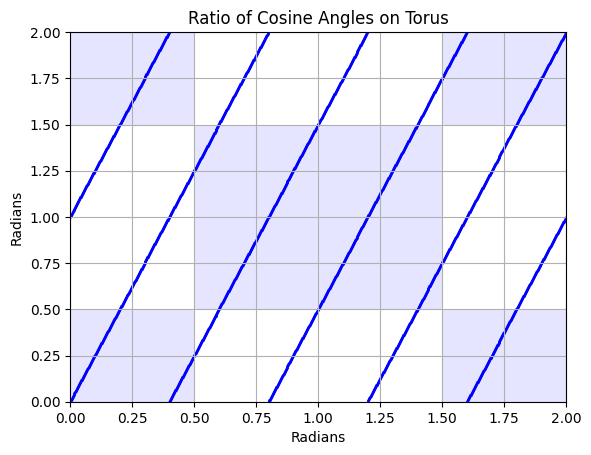

In [20]:
# Change the two numbers in the following list!
coeffs = [2, 5]
slope = max(coeffs)/min(coeffs)

N = 1000
x_0 = np.array([np.linspace(0, 2, N)])
y_0 = np.array([slope * np.linspace(0, 2, N)])

x, y = yoverload(x_0, y_0)
patches = get_patches([1])

plt.figure()
for i in range(len(y)):
  plt.scatter(x[i], y[i], s=1, color='blue')
for patch in patches:
  plt.gca().add_patch(patch)
plt.xlim(0, 2)
plt.ylim(0, 2)
plt.xlabel('Radians')
plt.ylabel('Radians')
plt.title('Ratio of Cosine Angles on Torus')
plt.grid()
plt.show()

In [ ]:
min_cor, a = 1/9, 1,
min_cor_values = list()
for b in range(1,8):
  for c in range(b+1,84):
    numerator = 0
    lcm = int((b*c) / math.gcd(b,c))
    denominator = 4 * lcm
    for i in range(denominator):
        x = np.cos(((i + 0.5) / (denominator)) * 2 * np.pi * a)
        y = np.cos(((i + 0.5) / (denominator)) * 2 * np.pi * b)
        z = np.cos(((i + 0.5) / (denominator)) * 2 * np.pi * c)
        if np.sign(x) == np.sign(y) and np.sign(y) == np.sign(z):
            numerator += 1
    if numerator/denominator <= min_cor:
        d = math.gcd(numerator,denominator)
        min_cor_values.append([a,b,c,int(numerator/d),int(denominator/d)])
for L in min_cor_values:
  print((L[0],L[1],L[2])," attains correlation ", L[3],"/",L[4])

(1, 3, 9)  attains correlation  1 / 9


In [ ]:
def exact_checker(L):
  n = len(L)
  GCD = 1
  product = 1
  for i in range(n):
    GCD = math.gcd(L[i],GCD)
    product = product * L[i]
  numerator = 0
  denominator = int(4 * product / GCD)
  for i in range(denominator):
    same_signs = True
    x_star = ((i + 0.5) / (denominator)) * 2 * np.pi
    sign = np.sign(math.cos(x_star * L[0]))
    for j in range(1,n):
      if np.sign(math.cos(x_star * L[j])) != sign:
        same_signs = False
    if same_signs == True:
      numerator += 1
  d = math.gcd(numerator,denominator)
  return(int(numerator/d),int(denominator/d))

exact_checker([1,3,11])

(5, 33)

In [ ]:
def exact_checker(L):
  n = len(L)
  GCD = 1
  product = 1
  for i in range(n):
    GCD = math.gcd(L[i],GCD)
    product = product * L[i]
  numerator = 0
  denominator = int(4 * product / GCD)
  for i in range(denominator):
    x_star = ((i + 0.5) / (denominator)) * 2 * np.pi
    sign = 0
    for i in range(n):
      sign += int(math.cos(x_star*L[i]) > 0)
    if (sign % n) == 0:
      numerator += 1
  d = math.gcd(numerator,denominator)
  return(int(numerator/d),int(denominator/d))

exact_checker([1,3,11,33,115,345])

(1, 345)

In [ ]:
exact_checker([1,3,35,105,115,345])

(13, 2415)

In [ ]:
exact_checker([1,3,11,33,115,371,1113])

In [ ]:
min_candidates = list()

for p in range(1,106):
  for q in range(p,106):
    for r in range(q,106):
      for s in range(r,106):
        if math.gcd(math.gcd(p,s),math.gcd(q,r)) == 1:
          same = 0
          for i in range(1000):
            t=2*math.pi*random.uniform(0,1)
            a = math.cos(p*t)
            b = math.cos(q*t)
            c = math.cos(r*t)
            d = math.cos(s*t)
            if np.sign(a) == np.sign(b) and np.sign(b) == np.sign(c) and np.sign(c) == np.sign(d):
              same += 1
          if same <= 50:
            num,den = exact_checker([p,q,r,s])
            if num/den <= 1/33:
              min_candidates.append([p,q,r,s,num,den])
              print((p,q,r,s)," attains correlation ",num,"/",den)

(1, 3, 11, 33)  attains correlation  1 / 33


In [ ]:
p=1
q=3
r=11

same = 0

for i in range(1000000):
  t=2*math.pi*random.uniform(0,1)
  a = math.cos(p*t)
  b = math.cos(q*t)
  c = math.cos(r*t)
  if np.sign(a) == np.sign(b) and np.sign(b) == np.sign(c):
    same += 1

same/1000000

0.151059

In [ ]:
for p in range(1,82):
  for q in range(p,82):
    for r in range(q,82):
      if math.gcd(p,math.gcd(q,r)) == 1:
        same = 0
        for i in range(1000):
          t=2*math.pi*random.uniform(0,1)
          a = math.cos(p*t)
          b = math.cos(q*t)
          c = math.cos(r*t)
          if np.sign(a) == np.sign(b) and np.sign(b) == np.sign(c):
            same += 1
        if same <= 200:
          for i in range(99000):
            t=2*math.pi*random.uniform(0,1)
            a = math.cos(p*t)
            b = math.cos(q*t)
            c = math.cos(r*t)
            if np.sign(a) == np.sign(b) and np.sign(b) == np.sign(c):
              same += 1
          if same/100000 < 0.15:
              print(p,q,r,same/100000)

1 3 7 0.14185
1 3 9 0.11117
1 3 21 0.1407
1 7 21 0.14173
3 7 21 0.14407


In [ ]:
for p in range(1,82):
  for q in range(p,82):
    for r in range(q,82):
      for s in range(r,82):
        if math.gcd(math.gcd(p,s),math.gcd(q,r)) == 1:
          same = 0
          for i in range(1000):
            t=2*math.pi*random.uniform(0,1)
            a = math.cos(p*t)
            b = math.cos(q*t)
            c = math.cos(r*t)
            d = math.cos(s*t)
            if np.sign(a) == np.sign(b) and np.sign(b) == np.sign(c) and np.sign(c) == np.sign(d):
              same += 1
          if same <= 100:
            for i in range(99000):
              t=2*math.pi*random.uniform(0,1)
              a = math.cos(p*t)
              b = math.cos(q*t)
              c = math.cos(r*t)
              d = math.cos(s*t)
              if np.sign(a) == np.sign(b) and np.sign(b) == np.sign(c) and np.sign(c) == np.sign(d):
                same += 1
            if same/100000 < 0.05:
              print(p,q,r,s,same/100000)

1 2 6 11 0.04461
1 3 4 12 0.04242
1 3 7 21 0.04809
1 3 9 21 0.04767
1 3 9 23 0.04324
1 3 9 25 0.04057
1 3 9 27 0.03733
1 3 9 29 0.0413
1 3 9 31 0.04762
1 3 9 63 0.04823
1 3 11 21 0.04812
1 3 11 31 0.04988
1 3 11 33 0.02996
1 3 21 63 0.04768
1 3 23 69 0.04318
1 7 11 21 0.04812
1 7 11 33 0.04821
1 7 21 63 0.04879
2 3 5 14 0.04766
2 3 6 13 0.04342
2 4 5 15 0.04132
2 5 6 11 0.04509
3 5 7 21 0.0468
3 5 9 21 0.04722
3 5 9 27 0.03773
3 7 9 21 0.04766
3 7 9 27 0.03743
3 7 21 63 0.04875


KeyboardInterrupt: ignored

In [ ]:
for p in range(3,82):
  for q in range(p,82):
    for r in range(q,82):
      for s in range(r,82):
        if math.gcd(math.gcd(p,s),math.gcd(q,r)) == 1:
          same = 0
          for i in range(1000):
            t=2*math.pi*random.uniform(0,1)
            a = math.cos(p*t)
            b = math.cos(q*t)
            c = math.cos(r*t)
            d = math.cos(s*t)
            if np.sign(a) == np.sign(b) and np.sign(b) == np.sign(c) and np.sign(c) == np.sign(d):
              same += 1
          if same <= 100:
            for i in range(99000):
              t=2*math.pi*random.uniform(0,1)
              a = math.cos(p*t)
              b = math.cos(q*t)
              c = math.cos(r*t)
              d = math.cos(s*t)
              if np.sign(a) == np.sign(b) and np.sign(b) == np.sign(c) and np.sign(c) == np.sign(d):
                same += 1
            if same/100000 < 0.05:
              print(p,q,r,s,same/100000)

3 5 7 21 0.04768
3 5 9 21 0.04701
3 5 9 27 0.03785
3 7 9 21 0.04825
3 7 9 27 0.03759
3 7 21 63 0.04714
3 9 11 27 0.04284
3 9 13 27 0.04847
4 5 7 12 0.04788
5 7 15 21 0.04699
5 7 21 63 0.04762
7 9 21 63 0.04757
9 11 21 63 0.04997


In [ ]:
p=1
q=3
r=11
s=33

same = 0

for i in range(1000000):
  t=2*math.pi*random.uniform(0,1)
  a = math.cos(p*t)
  b = math.cos(q*t)
  c = math.cos(r*t)
  d = math.cos(s*t)
  if np.sign(a) == np.sign(b) and np.sign(b) == np.sign(c) and np.sign(c) == np.sign(d):
    same += 1

same/1000000

KeyboardInterrupt: ignored

In [ ]:
for p in range(3,150):
  for q in range(p,150):
    for r in range(q,150):
      if math.gcd(math.gcd(p,q),r) == 1:
        same = 0
        for i in range(1000):
          t=2*math.pi*random.uniform(0,1)
          a = math.cos(t)
          b = math.cos(3*t)
          c = math.cos(p*t)
          d = math.cos(q*t)
          e = math.cos(r*t)
          f = math.cos(3*r*t)
          if np.sign(a) == np.sign(b) and np.sign(b) == np.sign(c) and np.sign(c) == np.sign(d) and np.sign(d) == np.sign(e) and np.sign(e) == np.sign(f):
            same += 1
        if same <= 10:
          for i in range(99000):
            t=2*math.pi*random.uniform(0,1)
            a = math.cos(t)
            b = math.cos(3*t)
            c = math.cos(p*t)
            d = math.cos(q*t)
            e = math.cos(r*t)
            f = math.cos(3*r*t)
            if np.sign(a) == np.sign(b) and np.sign(b) == np.sign(c) and np.sign(c) == np.sign(d) and np.sign(d) == np.sign(e) and np.sign(e) == np.sign(f):
              same += 1
          if same/100000 < 0.005:
              print(p,q,r,same/100000)

4 9 33 0.00448
4 10 35 0.00444
4 11 35 0.0049
4 11 38 0.00436
4 11 40 0.00443
4 12 35 0.00465
4 12 37 0.00461
4 12 39 0.00411
4 12 41 0.00374
4 12 43 0.00379
4 12 45 0.0046
4 14 39 0.00433
4 14 41 0.0046
4 14 43 0.00372
4 14 45 0.00397
4 14 47 0.00461
4 16 45 0.00417
4 16 47 0.00413
4 21 32 0.00475
4 23 35 0.00489
4 24 37 0.00458
4 25 38 0.00427
4 26 39 0.00417
4 27 40 0.00393
4 28 41 0.00393
4 28 43 0.00376
4 29 42 0.00393
4 29 44 0.00368
4 30 43 0.00391
4 30 45 0.00385
4 31 44 0.00464
4 31 46 0.00343
4 32 47 0.0042
6 11 35 0.00454
6 11 38 0.00447
6 11 40 0.00425
6 14 35 0.00478
6 14 49 0.00493
6 14 51 0.00332
6 14 53 0.0046
6 16 35 0.00465
6 16 41 0.00421
6 16 53 0.00323
6 16 55 0.00304
6 16 57 0.00324
6 16 59 0.00336
6 16 105 0.00447
6 18 35 0.00456
6 18 47 0.00356
6 18 59 0.00276
6 20 35 0.00499
6 21 38 0.00416
6 21 40 0.00413
6 23 35 0.00435
6 23 38 0.00421
6 23 40 0.00439
6 23 62 0.00489
6 23 64 0.00437
6 25 38 0.00446
6 25 40 0.00403
6 26 43 0.00447
6 27 40 0.00399
6 29 44 0.003

KeyboardInterrupt: ignored

In [ ]:
for p in range(7,150):
  for q in range(p,150):
    for r in range(q,150):
      if math.gcd(math.gcd(p,q),r) == 1:
        same = 0
        for i in range(1000):
          t=2*math.pi*random.uniform(0,1)
          a = math.cos(t)
          b = math.cos(3*t)
          c = math.cos(p*t)
          d = math.cos(q*t)
          e = math.cos(r*t)
          f = math.cos(3*r*t)
          if np.sign(a) == np.sign(b) and np.sign(b) == np.sign(c) and np.sign(c) == np.sign(d) and np.sign(d) == np.sign(e) and np.sign(e) == np.sign(f):
            same += 1
        if same <= 10:
          for i in range(99000):
            t=2*math.pi*random.uniform(0,1)
            a = math.cos(t)
            b = math.cos(3*t)
            c = math.cos(p*t)
            d = math.cos(q*t)
            e = math.cos(r*t)
            f = math.cos(3*r*t)
            if np.sign(a) == np.sign(b) and np.sign(b) == np.sign(c) and np.sign(c) == np.sign(d) and np.sign(d) == np.sign(e) and np.sign(e) == np.sign(f):
              same += 1
          if same/100000 < 0.005:
              print(p,q,r,same/100000)

7 10 34 0.00451
7 10 36 0.00458
7 12 36 0.00466
7 12 38 0.00441
7 12 40 0.00452
7 14 34 0.00478
7 14 36 0.00471
7 14 38 0.00426
7 14 40 0.00459
7 16 38 0.0043
7 16 40 0.00452
7 19 69 0.00484
7 21 34 0.0049
7 21 67 0.00495
7 21 71 0.00438
7 21 73 0.00458
7 21 75 0.00447
7 23 36 0.00463
7 23 38 0.00407
7 23 67 0.0049
7 23 69 0.00446
7 23 71 0.00469
7 23 73 0.00438
7 23 75 0.00433
7 23 77 0.0045
7 23 79 0.00388
7 23 81 0.00401
7 25 36 0.00489
7 25 38 0.00434
7 25 40 0.00476
7 25 71 0.00465
7 25 73 0.00451
7 25 75 0.00427
7 25 77 0.00472
7 25 79 0.00436
7 25 81 0.00409
7 27 75 0.00477
7 27 77 0.00406
7 27 79 0.00444
7 27 81 0.00418
7 29 81 0.00387
7 43 65 0.00495
7 47 69 0.00488
7 47 71 0.00485
7 49 71 0.0045
7 49 73 0.00468
7 49 75 0.00404
7 51 75 0.00439
7 51 77 0.00418
7 53 77 0.00437
7 53 79 0.00422
7 53 81 0.00409
7 55 79 0.00428
7 55 81 0.00416
8 9 33 0.00493
8 11 33 0.00459
8 11 35 0.0048
8 11 38 0.00435
8 11 40 0.00393
8 16 35 0.00473
8 16 41 0.00391
8 18 45 0.00362
8 20 35 0.00496

KeyboardInterrupt: ignored

In [ ]:
same = 0
n = 1000000000
for i in range(n):
  t=2*math.pi*random.uniform(0,1)
  a = math.cos(t)
  b = math.cos(3*t)
  c = math.cos(11*t)
  d = math.cos(35*t)
  e = math.cos(117*t)
  f = math.cos(117*3*t)
  if np.sign(a) == np.sign(b) and np.sign(b) == np.sign(c) and np.sign(c) == np.sign(d) and np.sign(d) == np.sign(e) and np.sign(e) == np.sign(f):
    same += 1
print(same/n)

0.002847902


In [ ]:

import random
import math
import numpy as np

#return true if all number in a list have same sign
def all_same_sign(lst):
    if lst[0] >= 0:
        return not any(i < 0 for i in lst)
    else:
        return not any(i >= 0 for i in lst)


#dimension here
d=3

#The correspond number n here
n = 3

# returns a array with d dimension that
# is in form of (n^0,n^1......,n^d)
l=[n**x for x in range(d)]
same = 0

for i in range(1000000):
    t=2*math.pi*random.uniform(0,1)
    lt = [math.cos(x*t) for x in l]
    if all_same_sign(lt):
        same += 1

print("The numerical answer is "+ str(same/1000000))
print("The reference value is " + str(1/(n**(d-1))))

In [ ]:

import random
import math
import numpy as np

#return true if all number in a list have same sign
def all_same_sign(lst):
    if lst[0] >= 0:
        return not any(i < 0 for i in lst)
    else:
        return not any(i >= 0 for i in lst)

#return the average of a list
def Average(lst):
    return sum(lst) / len(lst)

#change number below to test
#dimension here
d = 3
#number of test you want to do
test = 100

# Don't really need to change anything below
#The list that store the propotion of times of same sign with random t\in(0,1) given
test_l = []
#The list that store a list of parameter for correspond parametric function in each test
test_f =[]


for h in range(test):
    l = []
    same = 0
    for k in range(d):
        n = random.randint(1,100)
        l.append(n)
    for i in range(1000000):
        t=2*math.pi*random.uniform(0,1)
        lt = [math.cos(x*t) for x in l]
        if all_same_sign(lt):
            same += 1
    a =same/1000000
    test_l.append(a)
    test_f.append(l)

avg = Average(test_l)
print(avg)
